In [1]:
import pandas as pd 
import shapefile as shp
import matplotlib.pyplot as plt
from scipy.spatial import distance as dis
import numpy as np
from IPython.display import IFrame

In [2]:
data=shp.Reader("alcaldias.shp")

In [3]:
mapa=shp.Reader("alcaldias.shp")

In [4]:
pd.DataFrame(mapa)

,0
0,<shapefile.ShapeRecord object at 0x000001CBC32...
1,<shapefile.ShapeRecord object at 0x000001CBC32...
2,<shapefile.ShapeRecord object at 0x000001CBBFC...
3,<shapefile.ShapeRecord object at 0x000001CBC32...
4,<shapefile.ShapeRecord object at 0x000001CBC32...
5,<shapefile.ShapeRecord object at 0x000001CBC32...
6,<shapefile.ShapeRecord object at 0x000001CBC32...
7,<shapefile.ShapeRecord object at 0x000001CBC32...
8,<shapefile.ShapeRecord object at 0x000001CBC32...
9,<shapefile.ShapeRecord object at 0x000001CBC32...


In [5]:
len(mapa)

16

In [6]:
mapa.records()

[Record #0: ['Milpa Alta', '009', '09', '09009', '9'],
 Record #1: ['Benito Juárez', '014', '09', '09014', '14'],
 Record #2: ['Gustavo A. Madero', '005', '09', '09005', '5'],
 Record #3: ['Coyoacán', '003', '09', '09003', '3'],
 Record #4: ['Miguel Hidalgo', '016', '09', '09016', '16'],
 Record #5: ['La Magdalena Contreras', '008', '09', '09008', '8'],
 Record #6: ['Tláhuac', '011', '09', '09011', '11'],
 Record #7: ['Azcapotzalco', '002', '09', '09002', '2'],
 Record #8: ['Iztacalco', '006', '09', '09006', '6'],
 Record #9: ['Álvaro Obregón', '010', '09', '09010', '10'],
 Record #10: ['Xochimilco', '013', '09', '09013', '13'],
 Record #11: ['Venustiano Carranza', '017', '09', '09017', '17'],
 Record #12: ['Tlalpan', '012', '09', '09012', '12'],
 Record #13: ['Cuajimalpa de Morelos', '004', '09', '09004', '4'],
 Record #14: ['Cuauhtémoc', '015', '09', '09015', '15'],
 Record #15: ['Iztapalapa', '007', '09', '09007', '7']]

In [7]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [8]:
mapa_dataframe=read_shapefile(mapa)

In [9]:
def plot_map(sf, figsize = (12,12)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        

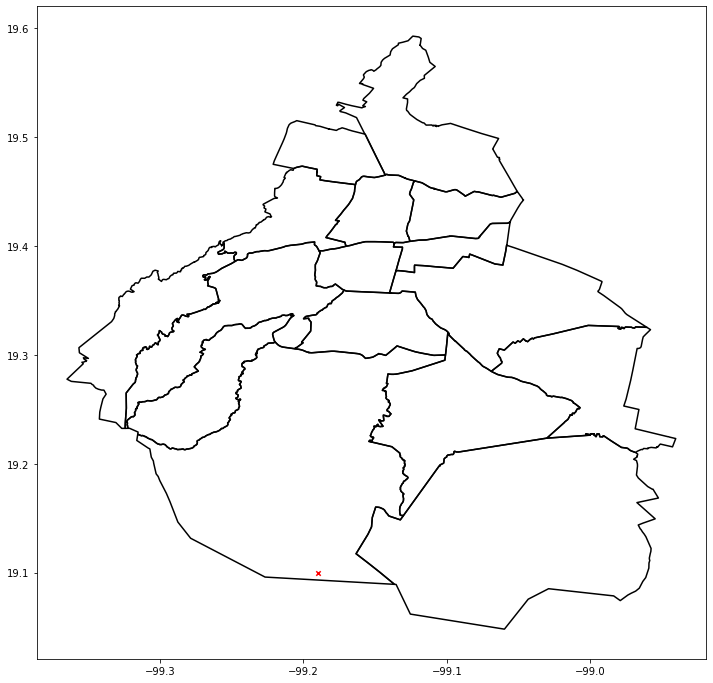

In [10]:
plot_map(mapa)
plt.scatter(-99.19,19.1,s=20,color="red",marker="x")

In [11]:
df = pd.read_csv("escuelas-publicas.csv")
df.head()

,id,nombre,domicilio_con_nombre,coordenadas,latitud,longitud,geopoint,domicilio
0,0,TELESECUNDARIA 63,DOMICILIO: ADMON U HAB CAMPAÑA DEL EBANO Y C C...,"-99.05424199980791,19.35316300009179,0",19.353163,-99.054242,"19.3531630001,-99.0542419998","ADMON U HAB CAMPAÑA DEL EBANO Y C CELAYA S/N, ..."
1,1,PREESCOLAR GENERAL CON SERVICIO ASISTENCIAL - ...,"DOMICILIO: PLAYA FLAMINGOS NO 1, MILITAR MARTE...","-99.12558263181295,19.37922441798433,0",19.379224,-99.125583,"19.379224418,-99.1255826318","PLAYA FLAMINGOS NO 1, MILITAR MARTE, DELEGACIO..."
2,2,PREESCOLAR GENERAL - ESTADO DE ZACATECAS,"DOMICILIO: CANAL DE SAN JUAN Y SUR 14 C, AGRIC...","-99.05933678879129,19.39268897307597,0",19.392689,-99.059337,"19.3926889731,-99.0593367888","CANAL DE SAN JUAN Y SUR 14 C, AGRICOLA ORIENTA..."
3,3,PRIMARIA GENERAL - PROFRA. AMANDA PALAFOX Y BAZ,"DOMICILIO: MONTE ELBRUZ NO 15, LOS VOLCANES, D...","-99.17674771482122,19.2697621281349,0",19.269762,-99.176748,"19.2697621281,-99.1767477148","MONTE ELBRUZ NO 15, LOS VOLCANES, DELEGACION T..."
4,4,PRIMARIA GENERAL - VALENTIN ZAMORA OROZCO,"DOMICILIO: RETORNO 33 Y 34 S/N, AVANTE, DELEGA...","-99.13093319192899,19.32847431855964,0",19.328474,-99.130933,"19.3284743186,-99.1309331919","RETORNO 33 Y 34 S/N, AVANTE, DELEGACION COYOAC..."


In [12]:
dfcorregidos=df.dropna(axis=0)

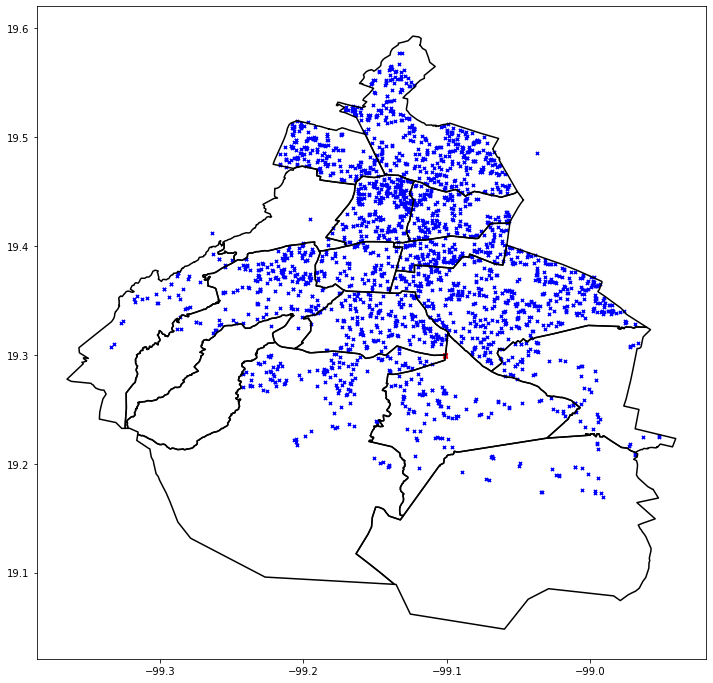

In [13]:
plot_map(mapa)
escuelas=df["longitud"],df["latitud"]
plt.scatter(escuelas[0],escuelas[1],s=10,color="blue",marker="x")
plt.scatter(-99.10106723281, 19.298663327264,s=20,color="red",marker="x")
plt.scatter(-99.10131120031, 19.2999141859,s=20,color="red",marker="x")

(-99.1953219998753, 19.42443800012623)
dentro: 1
fuera: 2205


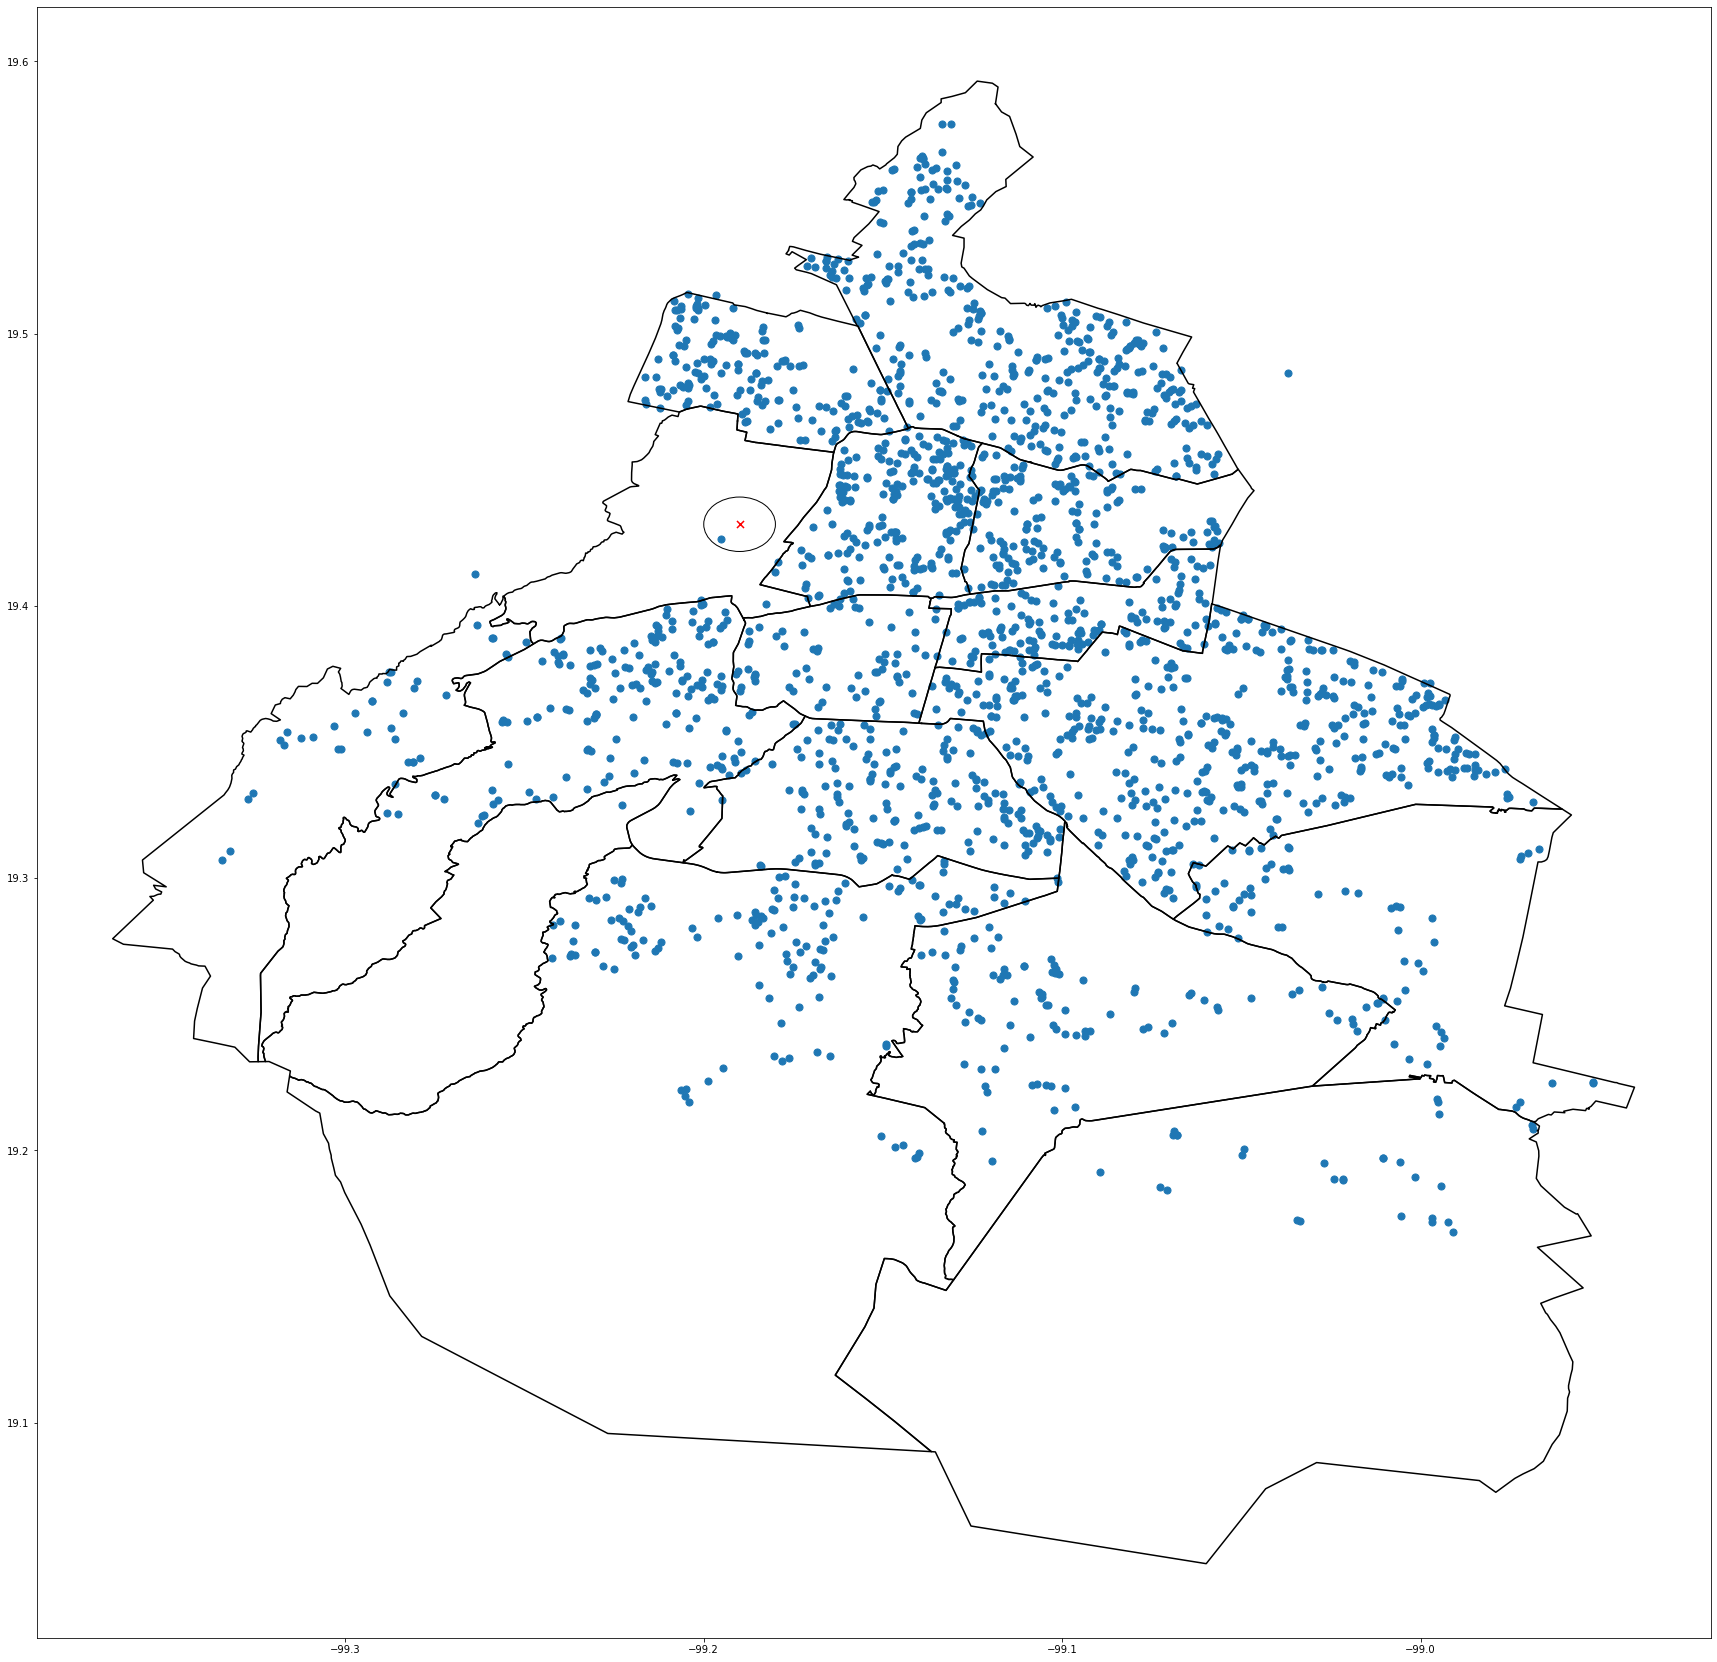

In [14]:
def plot_map(sf, figsize = (30,30)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
z=.01
x=list(dfcorregidos["longitud"])
y=list(dfcorregidos["latitud"])
centro=(-99.19,19.43)
contador_d=0
contador_f=0
for i in range(len(x)):
    punto=(x[i],y[i])
    distancia=dis.euclidean(punto,centro)
    if distancia<z:
        print(punto)
        contador_d=contador_d+1
    else:
        contador_f=contador_f+1
plot_map(mapa)
plt.scatter(x,y,s=50)
plt.scatter(centro[0],centro[1],color="red",s=50,marker="x")
plt.gca().add_patch(plt.Circle((centro[0],centro[1]),z,fill=False))
print("dentro:",contador_d)
print("fuera:",contador_f)

(-99.19981800000888, 19.49071100004872)
(-99.19247899989288, 19.49852699991352)
(-99.20161939897488, 19.50877297377279)
(-99.20160249577656, 19.50941072516172)
(-99.20671299999128, 19.50557500011736)
(-99.19538299991908, 19.49921699987063)
(-99.19740699989552, 19.49715799983211)
(-99.1913880711613, 19.49965306975717)
(-99.19814699991451, 19.49071399993012)
(-99.19374200011411, 19.49897600032447)
(-99.20551443969104, 19.49541315717577)
(-99.20488700023228, 19.49774899992672)
(-99.20717222672737, 19.502111738189768)
(-99.1978976838093, 19.49637235541362)
(-99.20677100003248, 19.49577200008391)
(-99.20756208960913, 19.50152991088672)
(-99.20203773414954, 19.5095178430086)
(-99.2080106330014, 19.50276416622518)
(-99.19687731097711, 19.50504830720887)
(-99.19654200009192, 19.49955700012821)
(-99.19175320581084, 19.49751210266956)
(-99.19358599985432, 19.49865199978522)
(-99.20283600008489, 19.50544200006406)
(-99.1926549999547, 19.50035099990041)
dentro: 24
fuera: 2182


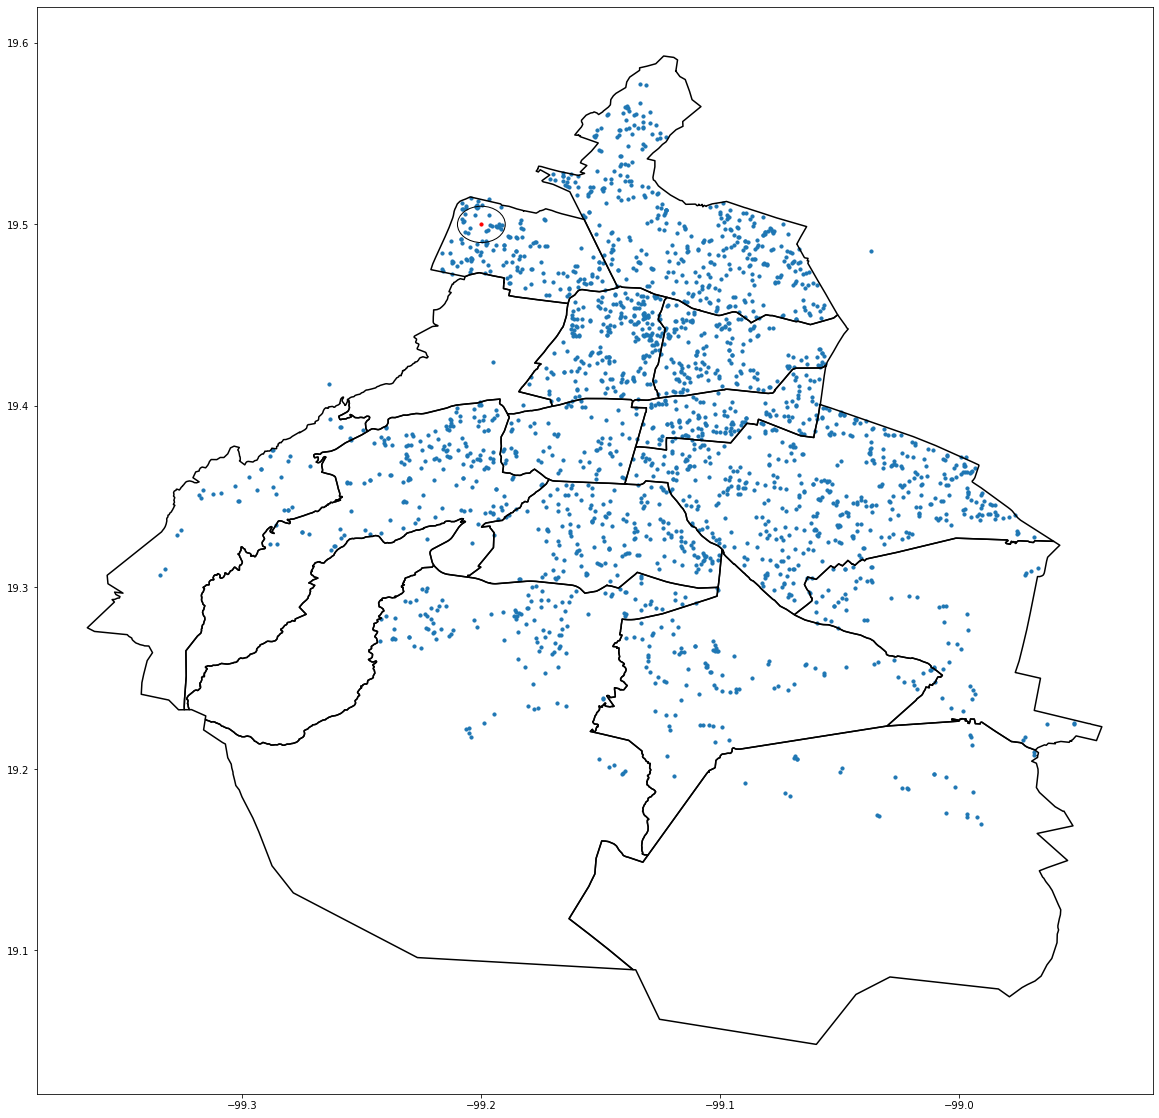

In [15]:
centro=(-99.2,19.5)
z=.01
x=list(dfcorregidos["longitud"])
y=list(dfcorregidos["latitud"])
contador_d=0
contador_f=0
for i in range(len(x)): 
    punto=(x[i],y[i])
    distancia=dis.euclidean(centro,punto)
    if distancia<z:
        print(punto)
        contador_d=contador_d+1
    else:
        contador_f=contador_f+1
plot_map(mapa,figsize=(20,20))
# plt.figure(figsize=(9,9))
plt.scatter(x,y,s=10)
plt.scatter(centro[0],centro[1],color="red",s=10)

plt.gca().add_patch(plt.Circle((centro[0],centro[1]),z,fill=False))
print("dentro:",contador_d)
print("fuera:",contador_f)

In [16]:
centro=(50,50)
contador_d=0
contador_f=0
for i in range(len(x)):
    punto=(x[i],y[i])
    print(punto)
len(punto)

(-99.0542419998, 19.35316300009)
(-99.12558263181, 19.37922441798)
(-99.05933678879, 19.39268897307)
(-99.17674771482, 19.26976212813)
(-99.130933191929, 19.32847431855964)
(-99.1667329999, 19.2827919998681)
(-99.05855823319, 19.34847620105)
(-99.10150500027, 19.26504900026)
(-99.03398273404, 19.25881521822)
(-99.12604100008, 19.25074599995)
(-99.12149599991, 19.223587999824)
(-99.09133324308, 19.38926398204)
(-99.0951658371, 19.437561045673)
(-99.05634406028, 19.42295455935)
(-99.32721599994484, 19.32895800024563)
(-99.00571399979, 19.19577099966)
(-99.13186799993244, 19.45011699976998)
(-99.11004700003, 19.42820499987)
(-99.18545357603, 19.28633144867)
(-99.06703768848, 19.34992031715)
(-99.24660600016608, 19.35925300000069)
(-99.30897399992044, 19.35199199977759)
(-99.13206300019364, 19.34465400022449)
(-99.1323549997, 19.39029699996)
(-99.12216099979, 19.38987700039)
(-99.07785608844, 19.39763921329)
(-99.14830900008, 19.5248360004)
(-99.16410750907, 19.52320046913)
(-99.0960429999

(-99.07771699994, 19.29876000008)
(-99.12437100006, 19.38361200015)
(-99.07902700007, 19.39427800036)
(-99.12552299994, 19.3816689997)
(-99.19936599337936, 19.39225609267144)
(-99.26184299124236, 19.32283564862103)
(-99.22793300016258, 19.33521099983617)
(-99.2301869999059, 19.36033300002976)
(-99.20224700004624, 19.3587590000778)
(-99.1983570000112, 19.3408959999651)
(-99.11345472651, 19.43494731583)
(-99.13181178774477, 19.4179975543426)
(-99.14552499963628, 19.41502500035715)
(-99.10055563067, 19.35111567469)
(-98.98520106088, 19.33757770795)
(-99.25449846714254, 19.34210979908044)
(-99.11642491335, 19.41929211321)
(-99.0540206587, 19.38382280195)
(-99.14575900014, 19.2952909998)
(-99.1041259999989, 19.31597300019825)
(-99.12338128723196, 19.32665569888632)
(-99.08034257884, 19.30685550199)
(-99.11679922664, 19.38846740196)
(-99.11160299986848, 19.32507800003686)
(-99.121675999973, 19.33023699970703)
(-99.1057913812, 19.25614843652)
(-99.0951139999, 19.40232900002)
(-99.10256982486,

2

In [17]:
y=list(df["latitud"])
y

[19.35316300009,
 19.37922441798,
 19.39268897307,
 19.26976212813,
 19.32847431855964,
 19.2827919998681,
 19.34847620105,
 19.26504900026,
 19.25881521822,
 19.25074599995,
 19.223587999824,
 19.38926398204,
 19.437561045673,
 19.42295455935,
 19.32895800024563,
 19.19577099966,
 19.45011699976998,
 19.42820499987,
 19.28633144867,
 19.34992031715,
 19.35925300000069,
 19.35199199977759,
 nan,
 19.34465400022449,
 19.39029699996,
 nan,
 nan,
 19.38987700039,
 19.39763921329,
 19.5248360004,
 19.52320046913,
 19.4756580001,
 19.37742176395,
 19.37247400034,
 19.33932362644,
 19.33254531399,
 19.35461755431,
 19.38719899973,
 19.38593999998,
 19.3398250000712,
 19.50102100004,
 19.52368062239,
 19.40268200007878,
 19.397658910193,
 19.25803770757,
 19.24381699968,
 19.30961099961738,
 19.3985990004,
 19.327175703285,
 19.36380799986,
 19.36590399984,
 19.35115745365,
 19.38698932595,
 19.34163701633,
 19.36033900027,
 19.33972600004,
 19.33524135423,
 19.36062080937,
 19.34067635488,
 

In [18]:
print(str(len(x))+ "y "+str(len(y)))

2206y 2383


In [19]:
len(x)

2206

In [20]:
print(centro,punto)
print(x)

(50, 50) (-99.13760900036104, 19.44658200008749)
[-99.0542419998, -99.12558263181, -99.05933678879, -99.17674771482, -99.130933191929, -99.1667329999, -99.05855823319, -99.10150500027, -99.03398273404, -99.12604100008, -99.12149599991, -99.09133324308, -99.0951658371, -99.05634406028, -99.32721599994484, -99.00571399979, -99.13186799993244, -99.11004700003, -99.18545357603, -99.06703768848, -99.24660600016608, -99.30897399992044, -99.13206300019364, -99.1323549997, -99.12216099979, -99.07785608844, -99.14830900008, -99.16410750907, -99.09604299996, -99.10849137138, -99.12334900022, -98.99257647763, -99.06845068457, -99.09052913971, -99.03650599987, -99.08127200002, -98.99029299999, -99.122765, -99.13983109455, -99.15845200003916, -99.14274207373268, -99.08004229548, -99.09222200006, -99.17010499995412, -99.05557600002, -99.04432140319, -98.9977360001, -99.118481, -99.06726060592, -99.07665313382, -99.03635006919, -99.01888600017, -99.05008199989, -99.11165771807, -99.01590034657, -99.0

In [21]:
pd.DataFrame(escuelas)

,0,1,2,3,4,5,6,7,8,9,...,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382
longitud,-99.054242,-99.125583,-99.059337,-99.176748,-99.130933,-99.166733,-99.058558,-99.101505,-99.033983,-99.126041,...,-99.116208,-99.146760,-99.190378,-99.079582,-99.146780,-99.100795,-99.123784,-99.204887,-99.162157,-99.137609
latitud,19.353163,19.379224,19.392689,19.269762,19.328474,19.282792,19.348476,19.265049,19.258815,19.250746,...,19.373234,19.379014,19.488739,19.442913,19.320942,19.314999,19.353679,19.497749,19.444375,19.446582


In [22]:
x=list(df["longitud"])
y=list(df["latitud"])
centro=(-99.1,19.3)
contador_d=0
contador_f=0

In [23]:
for i in range(len(x)):
    punto=(x[i],y[i])
    print(punto)
len(punto)

(-99.0542419998, 19.35316300009)
(-99.12558263181, 19.37922441798)
(-99.05933678879, 19.39268897307)
(-99.17674771482, 19.26976212813)
(-99.130933191929, 19.32847431855964)
(-99.1667329999, 19.2827919998681)
(-99.05855823319, 19.34847620105)
(-99.10150500027, 19.26504900026)
(-99.03398273404, 19.25881521822)
(-99.12604100008, 19.25074599995)
(-99.12149599991, 19.223587999824)
(-99.09133324308, 19.38926398204)
(-99.0951658371, 19.437561045673)
(-99.05634406028, 19.42295455935)
(-99.32721599994484, 19.32895800024563)
(-99.00571399979, 19.19577099966)
(-99.13186799993244, 19.45011699976998)
(-99.11004700003, 19.42820499987)
(-99.18545357603, 19.28633144867)
(-99.06703768848, 19.34992031715)
(-99.24660600016608, 19.35925300000069)
(-99.30897399992044, 19.35199199977759)
(nan, nan)
(-99.13206300019364, 19.34465400022449)
(-99.1323549997, 19.39029699996)
(nan, nan)
(nan, nan)
(-99.12216099979, 19.38987700039)
(-99.07785608844, 19.39763921329)
(-99.14830900008, 19.5248360004)
(-99.16410750907

(-99.20760999982572, 19.36051599991846)
(-99.134215622306, 19.45385290294713)
(-98.99551049343, 19.21885040662)
(-99.09265300007, 19.49819200009)
(-99.16135100004666, 19.43971900011676)
(-99.14160199996988, 19.44936899984156)
(-99.21779212354838, 19.37000910033296)
(-99.18175799985, 19.25614399989)
(-99.09336513125, 19.41278584044)
(-99.17719099999, 19.30079299987)
(-99.02913990946, 19.34698859285)
(-99.03729847042, 19.331401248763)
(-99.12209003398, 19.36379790688)
(-99.11298699998, 19.3502790001)
(-99.12851299982, 19.38781699959)
(-99.09797197756, 19.38557431539)
(-99.12372901956644, 19.31731312241279)
(-99.10215465852, 19.39557496244)
(-99.10773261521, 19.38417856029)
(-99.23138700004677, 19.34677800011301)
(-99.21449837995462, 19.38748453676182)
(-99.2391900000703, 19.38214000023814)
(nan, nan)
(nan, nan)
(-99.09240271089, 19.4479397592249)
(-99.12716446635, 19.24715032564)
(-99.1053272403, 19.42115837397)
(-99.10388604966, 19.25345499786)
(-99.11669596258, 19.40781036531)
(-99.063

2

dentro: 66
fuera: 434


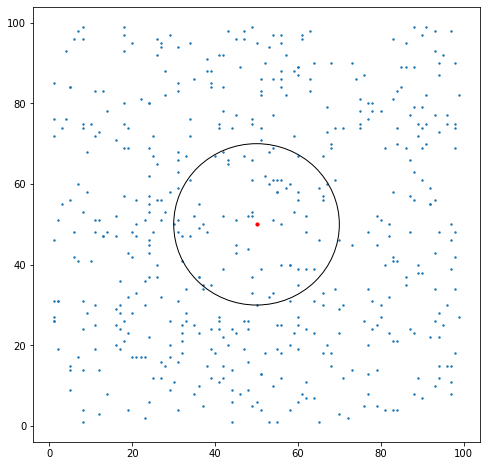

In [24]:
x=list(np.random.randint(1,100,500))
y=list(np.random.randint(1,100,500))
centro=(50,50)
contador_d=0
contador_f=0
for i in range(len(x)):
    punto=(x[i],y[i])
    distancia=dis.euclidean(centro,punto)
    if distancia<20:
        contador_d=contador_d+1
    else:
        contador_f=contador_f+1
        
plt.figure(figsize=(8,8))
plt.scatter(x,y,s=2)
plt.scatter(centro[0],centro[1],color="red",s=10)

plt.gca().add_patch(plt.Circle((centro[0],centro[1]),20,fill=False))
print("dentro:",contador_d)
print("fuera:",contador_f)

In [25]:
x

[56,
 82,
 59,
 49,
 39,
 24,
 90,
 18,
 9,
 31,
 51,
 20,
 94,
 31,
 21,
 51,
 79,
 24,
 55,
 66,
 41,
 2,
 31,
 60,
 17,
 50,
 2,
 62,
 69,
 49,
 75,
 16,
 42,
 56,
 44,
 2,
 53,
 86,
 93,
 24,
 39,
 63,
 3,
 76,
 94,
 43,
 89,
 61,
 54,
 14,
 97,
 80,
 85,
 54,
 8,
 8,
 83,
 5,
 92,
 52,
 63,
 94,
 40,
 41,
 16,
 34,
 58,
 17,
 56,
 19,
 48,
 78,
 71,
 88,
 9,
 36,
 49,
 27,
 20,
 60,
 24,
 8,
 1,
 38,
 88,
 23,
 44,
 30,
 61,
 60,
 62,
 1,
 97,
 50,
 28,
 66,
 11,
 43,
 56,
 29,
 79,
 22,
 32,
 60,
 93,
 49,
 71,
 82,
 11,
 43,
 19,
 93,
 99,
 54,
 57,
 38,
 96,
 68,
 66,
 68,
 97,
 16,
 43,
 84,
 69,
 20,
 62,
 87,
 93,
 21,
 53,
 70,
 98,
 80,
 8,
 18,
 54,
 36,
 79,
 89,
 56,
 51,
 66,
 8,
 94,
 98,
 21,
 78,
 73,
 88,
 47,
 73,
 35,
 64,
 63,
 39,
 8,
 42,
 24,
 47,
 7,
 93,
 36,
 41,
 52,
 34,
 84,
 96,
 42,
 41,
 56,
 81,
 33,
 23,
 59,
 68,
 81,
 90,
 88,
 41,
 4,
 80,
 87,
 37,
 45,
 18,
 34,
 58,
 86,
 19,
 97,
 27,
 66,
 3,
 1,
 39,
 7,
 7,
 53,
 56,
 40,
 76,
 65,
 62,
 